In [100]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
# cctv 데이터 읽기
seoul_cctv = pd.read_csv("data-files/seoul-cctv.csv", encoding="utf-8")

In [7]:
# 구분 컬럼을 제외한 나머지 컬럼의 데이터를 수치형으로 변경
columns = seoul_cctv.columns
for column in columns[1:]: # 총계, 2013이전, ...
    seoul_cctv[column] = seoul_cctv[column].map(lambda v: int(v.replace(",", "")))

In [23]:
# 컬럼이름 변경
seoul_cctv.rename(columns={"구분":"자치구"}, inplace=True)

In [19]:
# 합계 행 지우기
seoul_cctv.drop(0, axis=0, inplace=True) # axis=0 : 행 지우기, axis=1 : 열 지우기

In [26]:
# cctv 제일 많은 / 제일 적은 자치구
seoul_cctv.sort_values(by="총계", ascending=False).head()

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
23,강남구,7243,59,62,573,826,1295,989,744,790,923,514,468
21,관악구,5398,362,244,302,537,607,676,662,890,404,550,164
22,서초구,4995,74,86,70,559,518,1054,426,344,422,566,876
8,성북구,4842,137,170,229,322,594,811,867,714,253,407,338
17,구로구,4693,37,361,193,269,353,563,545,794,651,684,243


In [47]:
# 최근 증가율 (2020년 이후 증가분) 컬럼 만들기
# seoul_cctv.iloc[0, 2:10], seoul_cctv.iloc[0, 10:]
# seoul_cctv.iloc[0, 2:10].sum(), seoul_cctv.iloc[0, 10:].sum()
# seoul_cctv.iloc[0, 10:].sum() / seoul_cctv.iloc[0, 2:10].sum()

rate = ( seoul_cctv.iloc[:, 10:].sum(axis=1) / seoul_cctv.iloc[:, 2:10].sum(axis=1) ) * 100
seoul_cctv["최근증가율"] = rate


In [48]:
seoul_cctv.head()


,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,46.233383
2,중 구,2584,130,87,77,236,240,372,386,155,361,403,137,53.535354
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,93.937330
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,36.584543
5,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,46.526316


In [49]:
# 최근 CCTV 설치 증가율 높은 자치구
seoul_cctv.sort_values(by="최근증가율", ascending=False)

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
10,도봉구,2247,103,2,79,72,103,117,200,202,183,600,586,155.922551
9,강북구,3321,0,21,16,68,210,4,375,963,569,298,797,100.422450
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,93.937330
19,영등포구,4553,109,81,295,360,285,422,803,153,1357,329,359,81.539075
25,강동구,3190,82,195,56,174,226,351,379,362,635,301,429,74.794521
7,중랑구,4193,224,331,104,145,153,170,215,1074,976,507,294,73.551325
16,강서구,3265,67,59,202,193,168,506,259,458,359,439,555,70.763598
18,금천구,2636,0,0,43,361,133,196,539,367,513,207,277,60.829774
22,서초구,4995,74,86,70,559,518,1054,426,344,422,566,876,59.533695
13,서대문구,3445,312,144,127,77,254,524,389,344,587,207,480,58.682635


In [53]:
# # 최근 증가율이 50% 이상인 자치구
boolean_filter = seoul_cctv["최근증가율"] >= 50
seoul_cctv[boolean_filter]

In [123]:
# 데이터프레임을 파일에 저장
seoul_cctv.to_csv("processed-seoul-cctv.csv", 
                  encoding="utf-8", 
                  index=False) # index는 파일에 저장하지 않도록 설정

In [ ]:
# 인구 데이터 읽기
# 고령자비율, 외국인비율 컬럼 추가
# 인구수가 많은 / 적은 자치구
# 고령자비율이 높은 / 낮은 자치구
# 외국인비율이 높은 / 낮은 자치구

In [54]:
# 데이터 읽기
seoul_population = pd.read_csv("data-files/seoul-population.csv", encoding="utf-8")

In [55]:
# 컬럼명 변경
columns2 = seoul_population.columns
zipped_data = zip(columns2, ["자치구", "세대수", "인구수", "한국인", "외국인", "세대당인구", "고령자"])
rename_map = { c1:c2 for c1, c2 in zipped_data }
seoul_population.rename(columns=rename_map, inplace=True)

In [71]:
# 총합 행 지우기
seoul_population.drop(0, axis=0, inplace=True)

In [59]:
# 고령자비율, 외국인비율 컬럼 추가
seoul_population["고령자비율"] = seoul_population["고령자"] / seoul_population["인구수"] * 100
seoul_population["외국인비율"] = seoul_population["외국인"] / seoul_population["인구수"] * 100

In [72]:
seoul_population.head()

,자치구,세대수,인구수,한국인,외국인,세대당인구,고령자,고령자비율,외국인비율
1,종로구,72524,152211,141379,10832,1.95,27958,18.367923,7.116437
2,중구,63139,130785,120437,10348,1.91,25055,19.157396,7.912222
3,용산구,109805,233284,218650,14634,1.99,39037,16.733681,6.273041
4,성동구,133305,288234,281000,7234,2.11,47720,16.555993,2.509766
5,광진구,169291,351252,337416,13836,1.99,54071,15.393791,3.939052


In [65]:
seoul_population.sort_values(by="인구수", ascending=False).head()
seoul_population.sort_values(by="고령자비율", ascending=False).head()
seoul_population.sort_values(by="외국인비율", ascending=False).head()

,자치구,세대수,인구수,한국인,외국인,세대당인구,고령자,고령자비율,외국인비율
2,중구,63139,130785,120437,10348,1.91,25055,19.157396,7.912222
1,종로구,72524,152211,141379,10832,1.95,27958,18.367923,7.116437
3,용산구,109805,233284,218650,14634,1.99,39037,16.733681,6.273041
19,영등포구,188832,398085,375675,22410,1.99,64810,16.280443,5.629451
17,구로구,183655,418418,395315,23103,2.15,75890,18.137365,5.521512


In [80]:
# CCTV 데이터와 인구 데이터 병합
# seoul_cctv
# seoul_population["자치구"] == seoul_cctv["자치구"] # 불일치 데이터 찾기
# seoul_cctv.iloc[1, 0], seoul_population.iloc[1, 0] # 불일치 데이터 확인 : '중 구' 데이터 발견

seoul_cctv.iloc[1, 0] = seoul_cctv.iloc[1, 0].replace(" ", "") # 불일치 데이터 수정 : '중 구' -> '중구'

# seoul_population["자치구"] == seoul_cctv["자치구"] # 불일치 데이터 확인

# 병합 : "자치구" 컬럼의 데이터가 일치하는 행끼리 모아서 새로운 행으로 만드는 병합
seoul_cctv_population = pd.merge(seoul_cctv, seoul_population, on="자치구") 


In [81]:
seoul_cctv_population

,자치구,총계,2013년 이전 설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,2022년,최근증가율,세대수,인구수,한국인,외국인,세대당인구,고령자,고령자비율,외국인비율
0,종로구,1980,36,540,107,161,131,158,152,69,...,291,46.233383,72524,152211,141379,10832,1.95,27958,18.367923,7.116437
1,중구,2584,130,87,77,236,240,372,386,155,...,137,53.535354,63139,130785,120437,10348,1.91,25055,19.157396,7.912222
2,용산구,2847,44,50,68,83,295,491,115,322,...,334,93.937330,109805,233284,218650,14634,1.99,39037,16.733681,6.273041
3,성동구,4047,58,99,110,366,279,945,459,647,...,232,36.584543,133305,288234,281000,7234,2.11,47720,16.555993,2.509766
4,광진구,3480,507,82,84,64,21,465,443,709,...,271,46.526316,169291,351252,337416,13836,1.99,54071,15.393791,3.939052
5,동대문구,2759,1,4,12,107,802,711,201,218,...,259,34.192607,169873,353601,336644,16957,1.98,64468,18.231849,4.795518
6,중랑구,4193,224,331,104,145,153,170,215,1074,...,294,73.551325,187413,390140,385318,4822,2.06,74920,19.203363,1.235967
7,성북구,4842,137,170,229,322,594,811,867,714,...,338,25.962539,197082,441984,430397,11587,2.18,77475,17.528915,2.621588
8,강북구,3321,0,21,16,68,210,4,375,963,...,797,100.422450,144313,297702,293660,4042,2.03,66307,22.272944,1.357734
9,도봉구,2247,103,2,79,72,103,117,200,202,...,586,155.922551,138356,313989,311694,2295,2.25,66998,21.337690,0.730917


In [91]:
seoul_cctv_population.columns

Index(['자치구', '총계', '2013년 이전 설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '최근증가율', '세대수',
       '인구수', '한국인', '외국인', '세대당인구', '고령자', '고령자비율', '외국인비율'],
      dtype='object')

In [94]:
# 총계, 최근증가율, 한국인, 외국인, 고령자, 외국인비율, 고령자비율 컬럼의 데이터만 뽑기
# filtered_seoul_cctv_population = seoul_cctv_population[['자치구', '총계', '최근증가율', '한국인', '외국인', '고령자', '외국인비율', '고령자비율']]

columns_to_drop = seoul_cctv_population.columns[2:13].append(seoul_cctv_population.columns[14:15])\
                                                     .append(seoul_cctv_population.columns[18:19])
filtered_seoul_cctv_population = seoul_cctv_population.drop(columns_to_drop, axis=1)

In [95]:
filtered_seoul_cctv_population

,자치구,총계,최근증가율,인구수,한국인,외국인,고령자,고령자비율,외국인비율
0,종로구,1980,46.233383,152211,141379,10832,27958,18.367923,7.116437
1,중구,2584,53.535354,130785,120437,10348,25055,19.157396,7.912222
2,용산구,2847,93.937330,233284,218650,14634,39037,16.733681,6.273041
3,성동구,4047,36.584543,288234,281000,7234,47720,16.555993,2.509766
4,광진구,3480,46.526316,351252,337416,13836,54071,15.393791,3.939052
5,동대문구,2759,34.192607,353601,336644,16957,64468,18.231849,4.795518
6,중랑구,4193,73.551325,390140,385318,4822,74920,19.203363,1.235967
7,성북구,4842,25.962539,441984,430397,11587,77475,17.528915,2.621588
8,강북구,3321,100.422450,297702,293660,4042,66307,22.272944,1.357734
9,도봉구,2247,155.922551,313989,311694,2295,66998,21.337690,0.730917


In [96]:
# 상관계수 확인
np.corrcoef(filtered_seoul_cctv_population["인구수"], filtered_seoul_cctv_population["총계"])

array([[1.        , 0.46670661],
       [0.46670661, 1.        ]])

In [98]:
# 상관계수 확인
np.corrcoef(filtered_seoul_cctv_population["외국인비율"], filtered_seoul_cctv_population["총계"])
np.corrcoef(filtered_seoul_cctv_population["고령자비율"], filtered_seoul_cctv_population["총계"])

array([[ 1.        , -0.34223068],
       [-0.34223068,  1.        ]])

In [99]:
# 상관계수 확인
filtered_seoul_cctv_population[["총계", "인구수", "외국인비율", "고령자비율"]].corr()

,총계,인구수,외국인비율,고령자비율
총계,1.000000,0.466707,-0.296502,-0.342231
인구수,0.466707,1.000000,-0.712986,-0.386018
외국인비율,-0.296502,-0.712986,1.000000,0.023325
고령자비율,-0.342231,-0.386018,0.023325,1.000000


In [108]:
# 상관계수 확인
sp.stats.pearsonr(filtered_seoul_cctv_population["인구수"], filtered_seoul_cctv_population["총계"]),\
sp.stats.pearsonr(filtered_seoul_cctv_population["외국인비율"], filtered_seoul_cctv_population["총계"]),\
sp.stats.pearsonr(filtered_seoul_cctv_population["고령자비율"], filtered_seoul_cctv_population["총계"])

(PearsonRResult(statistic=0.46670661089014326, pvalue=0.018679067058764747),
 PearsonRResult(statistic=-0.2965020564234063, pvalue=0.15009133326443036),
 PearsonRResult(statistic=-0.3422306826114476, pvalue=0.09402250343263159))

In [110]:
# 데이터프레임 인덱스(행식별값) 확인
filtered_seoul_cctv_population.head()
filtered_seoul_cctv_population.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [112]:
# 인덱스 수정
filtered_seoul_cctv_population.set_index("자치구", inplace=True)

In [113]:
filtered_seoul_cctv_population.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,고령자비율,외국인비율
자치구,,,,,,,,
종로구,1980,46.233383,152211,141379,10832,27958,18.367923,7.116437
중구,2584,53.535354,130785,120437,10348,25055,19.157396,7.912222
용산구,2847,93.937330,233284,218650,14634,39037,16.733681,6.273041
성동구,4047,36.584543,288234,281000,7234,47720,16.555993,2.509766
광진구,3480,46.526316,351252,337416,13836,54071,15.393791,3.939052


In [116]:
# 인덱스 제거
filtered_seoul_cctv_population.reset_index(drop=False) # drop : 원래 index를 제거할지 일반컬럼으로 사용할지 결정

,자치구,총계,최근증가율,인구수,한국인,외국인,고령자,고령자비율,외국인비율
0,종로구,1980,46.233383,152211,141379,10832,27958,18.367923,7.116437
1,중구,2584,53.535354,130785,120437,10348,25055,19.157396,7.912222
2,용산구,2847,93.937330,233284,218650,14634,39037,16.733681,6.273041
3,성동구,4047,36.584543,288234,281000,7234,47720,16.555993,2.509766
4,광진구,3480,46.526316,351252,337416,13836,54071,15.393791,3.939052
5,동대문구,2759,34.192607,353601,336644,16957,64468,18.231849,4.795518
6,중랑구,4193,73.551325,390140,385318,4822,74920,19.203363,1.235967
7,성북구,4842,25.962539,441984,430397,11587,77475,17.528915,2.621588
8,강북구,3321,100.422450,297702,293660,4042,66307,22.272944,1.357734
9,도봉구,2247,155.922551,313989,311694,2295,66998,21.337690,0.730917


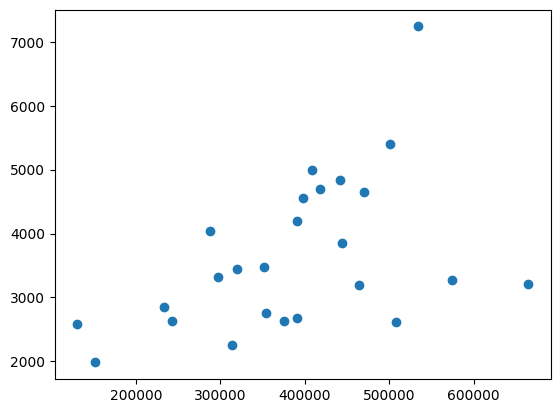

In [120]:
plt.scatter(filtered_seoul_cctv_population["인구수"], filtered_seoul_cctv_population["총계"])
plt.show()